In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt


In [2]:

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0, 1"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 2GB of memory on the first GPU
  try:
    """
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*2)])
    """
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


In [3]:
print(tf.config.experimental.list_logical_devices())

[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU'), LogicalDevice(name='/device:XLA_GPU:0', device_type='XLA_GPU')]


In [4]:
size = 224

In [5]:
train_data, metadata = tfds.load('cats_vs_dogs', split=['train'], with_info=1, as_supervised=1)

In [6]:
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (size, size))
  img = img / 255
  return img, label

In [7]:
train_data_resized = train_data[0].map(resize_image)
train_batches = train_data_resized.shuffle(500).batch(16)

In [8]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(size,size, 3), include_top=0)
base_layers.trainable = 0

In [9]:
model = tf.keras.Sequential([
                             
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.1),
                             Dense(1)
                             
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)


In [14]:
checkpoint_dir = os.path.dirname(checkpoint_path)

# Создаем коллбек сохраняющий веса модели
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Обучаем модель с новым коллбеком
model.fit(train_batches,
          epochs=5,
          callbacks=[cp_callback])  # Pass callback to training

# Это может генерировать предупреждения относящиеся к сохранению состояния оптимизатора.
# Эти предупреждения (и подобные предупреждения в этом уроке)
# используются для предотвращения устаревшего использования и могут быть проигнорированы.


Epoch 1/5
1454/1454 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9901
Epoch 00001: saving model to training_1\cp.ckpt
1454/1454 [==============================] - 82s 56ms/step - loss: 0.0284 - accuracy: 0.9901
Epoch 2/5
1453/1454 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9897
Epoch 00002: saving model to training_1\cp.ckpt
1454/1454 [==============================] - 83s 57ms/step - loss: 0.0289 - accuracy: 0.9897
Epoch 3/5
1453/1454 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9893
Epoch 00003: saving model to training_1\cp.ckpt
1454/1454 [==============================] - 84s 58ms/step - loss: 0.0286 - accuracy: 0.9893
Epoch 4/5
1453/1454 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9898
Epoch 00004: saving model to training_1\cp.ckpt
1454/1454 [==============================] - 86s 59ms/step - loss: 0.0282 - accuracy: 0.9898
Epoch 5/5
1454/1454 [===========================

Такого файла нет в дирректории


<ipython-input-11-077addf6083f>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


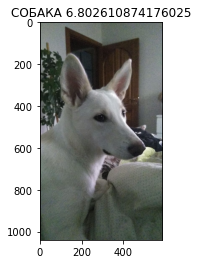

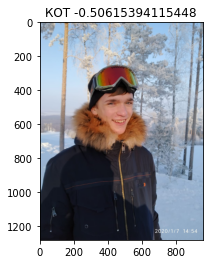

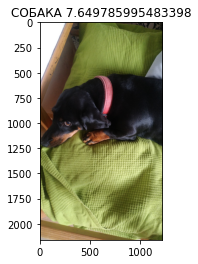

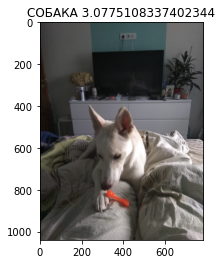

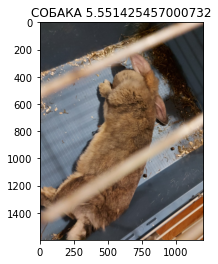

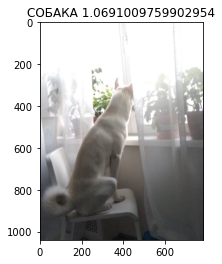

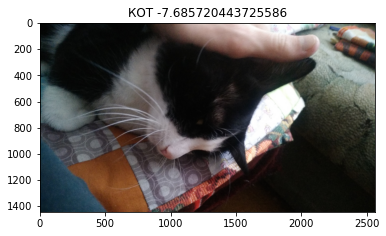

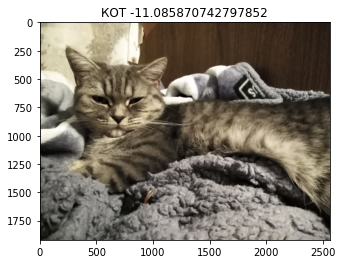

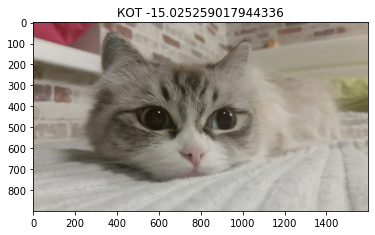

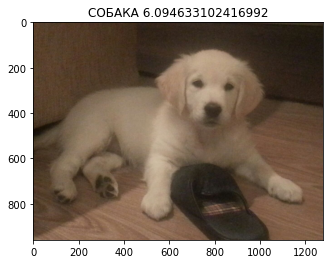

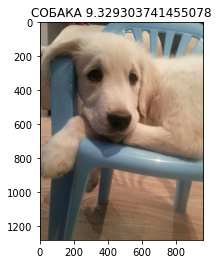

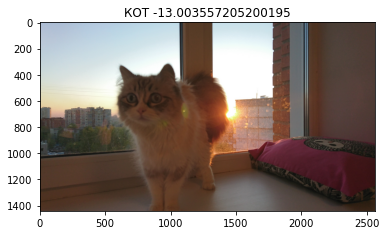

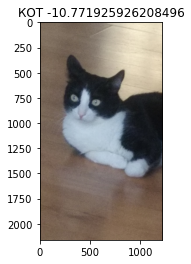

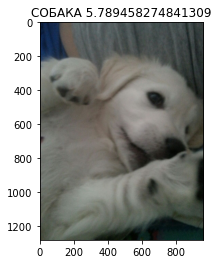

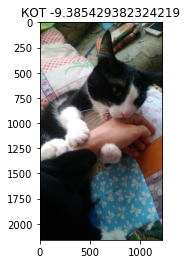

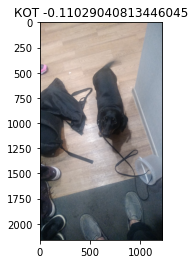

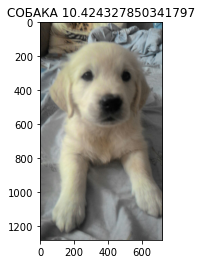

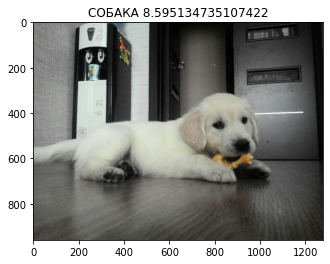

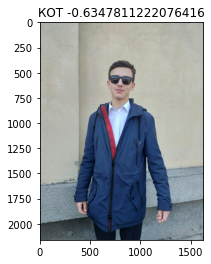

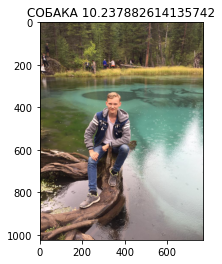

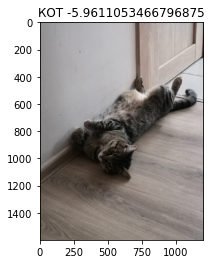

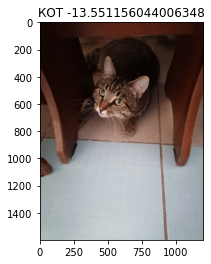

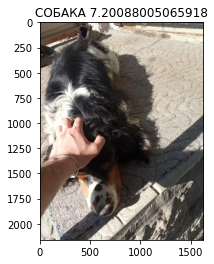

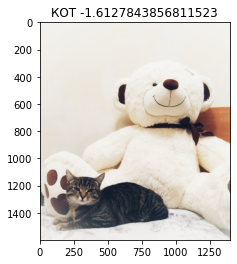

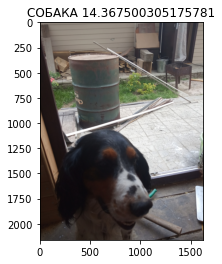

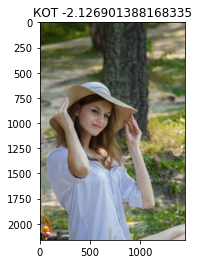

In [11]:
for i in range(27):
 try:
  img = load_img('photos/' + f'{i+1}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize_image(img_array, _)
  img_expended = np.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'КОТ' if prediction < 0.5 else 'СОБАКА'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')
 except:
        print('Такого файла нет в дирректории')